In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
lamost = pd.read_csv('full_data.csv')
lamost.pop('Unnamed: 0')
lamost.head(5)

,obsid,uid,gp_id,designation,obsdate,lmjd,mjd,planid,spid,fiberid,...,logg_err,source_id,solution_id,ra,dec,flux,flux_error,SNR_gaia,mean_snr_lamost,SNR_lamost_mean
0,4302066,G16614776306411,3421375900092772352,J052000.45+271629.1,2011-11-12,55878,55877,GAC_080N28_B1,2,66,...,-9999.0,3421375900092772352,4545469030156206081,80.001905,27.274760,"[4.702319e-17,3.3818403e-17,2.890806e-17,3.197...","[5.6705386e-18,4.096698e-18,3.301896e-18,2.841...",51.742792,2.790,2.790
1,4303076,G16616211403281,3422425109064461184,J051729.38+284840.9,2011-11-12,55878,55877,GAC_080N28_B1,3,76,...,-9999.0,3422425109064461184,4545469030156206081,79.372464,28.811368,"[3.01145e-17,1.9405108e-17,2.3832594e-17,2.871...","[3.5389086e-18,2.5089825e-18,1.987536e-18,1.92...",54.041758,11.546,11.546
2,4516120,G16860278183090,507587382602316544,J020728.65+601542.4,2011-11-13,55879,55878,B7905_1,16,120,...,-9999.0,507587382602316544,4545469030156206081,31.869457,60.261809,"[9.702513e-18,1.07273455e-17,1.2335912e-17,1.1...","[3.0450003e-18,2.2279167e-18,1.8311533e-18,1.5...",54.893125,10.868,10.868
3,4610109,G16866917626282,505387740875111424,J015703.16+580628.4,2011-11-13,55879,55878,B7905_2,10,109,...,-9999.0,505387740875111424,4545469030156206081,29.263210,58.107935,"[7.580544e-17,6.94717e-17,6.2443745e-17,5.8902...","[7.6122446e-18,5.5980374e-18,4.572536e-18,3.87...",60.983448,11.214,11.214
4,5209124,G16603078332937,3443191237286001024,J055322.06+283518.1,2011-11-14,55880,55879,GAC_087N27_B1_1,9,124,...,-9999.0,3443191237286001024,4545469030156206081,88.341968,28.588366,"[5.732198e-17,5.1689034e-17,5.1337413e-17,5.16...","[4.944086e-18,3.747599e-18,3.0944746e-18,2.719...",50.054074,5.320,5.320


In [3]:
gaia = pd.read_csv('flux_gaia.csv')
gaia.pop('Unnamed: 0')
gaia

,336.0,338.0,340.0,342.0,344.0,346.0,348.0,350.0,352.0,354.0,...,1002.0,1004.0,1006.0,1008.0,1010.0,1012.0,1014.0,1016.0,1018.0,1020.0
0,3.360000e+02,3.380000e+02,3.400000e+02,3.420000e+02,3.440000e+02,3.460000e+02,3.480000e+02,3.500000e+02,3.520000e+02,3.540000e+02,...,1.002000e+03,1.004000e+03,1.006000e+03,1.008000e+03,1.010000e+03,1.012000e+03,1.014000e+03,1.016000e+03,1.018000e+03,1.020000e+03
1,4.702319e-17,3.381840e-17,2.890806e-17,3.197863e-17,3.564173e-17,3.332230e-17,2.806158e-17,2.743496e-17,3.304186e-17,3.672462e-17,...,5.069003e-17,4.959312e-17,4.898656e-17,4.743713e-17,4.650921e-17,4.596943e-17,4.492957e-17,4.557578e-17,4.534698e-17,4.696055e-17
2,3.011450e-17,1.940511e-17,2.383259e-17,2.871886e-17,2.614950e-17,2.139932e-17,2.265599e-17,2.731747e-17,2.684658e-17,2.148471e-17,...,3.062854e-17,2.967638e-17,2.922163e-17,2.847382e-17,2.842568e-17,2.898779e-17,2.959787e-17,3.165253e-17,3.332371e-17,3.641728e-17
3,9.702513e-18,1.072735e-17,1.233591e-17,1.193039e-17,9.912628e-18,7.890062e-18,7.508684e-18,9.059178e-18,1.147858e-17,1.269231e-17,...,4.930190e-17,4.845588e-17,4.799734e-17,4.650092e-17,4.548696e-17,4.472800e-17,4.338765e-17,4.363081e-17,4.307414e-17,4.441011e-17
4,7.580544e-17,6.947170e-17,6.244375e-17,5.890222e-17,5.896454e-17,5.800793e-17,5.618475e-17,5.680695e-17,6.051840e-17,6.030938e-17,...,6.729317e-17,6.525996e-17,6.382966e-17,6.122542e-17,5.959073e-17,5.872769e-17,5.760303e-17,5.909294e-17,5.990813e-17,6.356432e-17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1108,3.259702e-16,3.077689e-16,2.847433e-16,2.748445e-16,2.731809e-16,2.674935e-16,2.662898e-16,2.726458e-16,2.825643e-16,2.892657e-16,...,4.595932e-16,4.517270e-16,4.492571e-16,4.391697e-16,4.358637e-16,4.372045e-16,4.344595e-16,4.483663e-16,4.534892e-16,4.763166e-16
1109,6.319763e-17,4.962959e-17,3.742732e-17,3.509757e-17,4.259903e-17,4.936463e-17,4.799473e-17,4.203639e-17,4.182081e-17,4.679952e-17,...,3.098675e-16,3.042723e-16,3.031971e-16,2.979867e-16,2.983904e-16,3.029051e-16,3.051844e-16,3.193585e-16,3.269070e-16,3.462371e-16
1110,9.230867e-16,9.480213e-16,9.333781e-16,9.015530e-16,8.821834e-16,8.648405e-16,8.454087e-16,8.185249e-16,8.118505e-16,8.222287e-16,...,2.095709e-17,2.055011e-17,2.047580e-17,2.013796e-17,2.018603e-17,2.051400e-17,2.069284e-17,2.168844e-17,2.225877e-17,2.367746e-17
1111,1.457715e-16,1.407476e-16,1.331949e-16,1.205521e-16,1.138703e-16,1.168624e-16,1.216970e-16,1.188446e-16,1.183607e-16,1.305205e-16,...,1.470846e-16,1.471671e-16,1.487900e-16,1.473482e-16,1.472975e-16,1.476421e-16,1.452061e-16,1.468066e-16,1.441144e-16,1.459133e-16


In [4]:
param = pd.read_csv('parameter yg tersedia')
#param.pop('Unnamed: 0')
param

,source_id,parallax,phot_g_mean_mag,bp_rp,radial_velocity,radial_velocity_error,logg_gspphot,teff_gspphot,mh_gspphot
0,3421375900092772352,0.807234,13.880873,0.986093,NaN,NaN,4.0996,9442.5350,-0.7773
1,3422425109064461184,0.591876,14.216793,0.849067,NaN,NaN,4.1700,7989.1950,-0.5155
2,507587382602316544,0.670442,14.406285,1.488364,5.927681,5.506062,3.5397,8880.6710,-0.1447
3,3443191237286001024,0.519595,14.077073,0.488182,NaN,NaN,4.0373,9553.6650,-1.3164
4,199846855507462144,4.264049,10.235985,0.719276,-21.439533,0.450973,4.1341,6833.2060,-0.6632
...,...,...,...,...,...,...,...,...,...
573,3383098876674928896,0.810216,11.949348,0.207321,-4.424756,5.843917,3.9871,8983.1570,-0.4072
574,603085739904178816,2.256620,11.406276,0.826352,9.941437,0.291888,4.0421,5654.9280,-0.1531
575,3140492456344220544,0.836845,11.474646,1.158264,49.908546,0.626855,3.1232,5858.4624,-0.1219
576,1341799048000581376,1.660910,12.558516,0.978560,-28.108750,0.777249,4.0685,5478.9644,-0.2601


In [5]:
gaia = gaia.drop([0])
gaia = gaia*1e+20
ab = lamost.wd_subclass.tolist()
gaia['wd_subclass'] = ab
gaia

,336.0,338.0,340.0,342.0,344.0,346.0,348.0,350.0,352.0,354.0,...,1004.0,1006.0,1008.0,1010.0,1012.0,1014.0,1016.0,1018.0,1020.0,wd_subclass
1,4702.31900,3381.84030,2890.80600,3197.86300,3564.17270,3332.22960,2806.15830,2743.49640,3304.1860,3672.462200,...,4959.3124,4898.6562,4743.7134,4650.9210,4596.9428,4492.9572,4557.5782,4534.6980,4696.0552,DAZ
2,3011.45000,1940.51080,2383.25940,2871.88640,2614.94970,2139.93230,2265.59870,2731.74730,2684.6575,2148.470500,...,2967.6380,2922.1630,2847.3817,2842.5675,2898.7790,2959.7870,3165.2526,3332.3712,3641.7278,DA
3,970.25130,1072.73455,1233.59120,1193.03930,991.26280,789.00620,750.86840,905.91780,1147.8581,1269.230700,...,4845.5883,4799.7337,4650.0920,4548.6963,4472.8000,4338.7648,4363.0806,4307.4140,4441.0106,DAZ
4,7580.54400,6947.17000,6244.37450,5890.22150,5896.45400,5800.79300,5618.47500,5680.69460,6051.8400,6030.938000,...,6525.9964,6382.9660,6122.5420,5959.0727,5872.7690,5760.3030,5909.2940,5990.8126,6356.4324,DA
5,5732.19800,5168.90340,5133.74130,5163.23720,5002.85550,4764.12900,4716.81780,4726.41300,4686.2766,4691.796200,...,2567.2482,2459.8012,2303.8955,2184.8419,2098.0940,2012.5440,2035.1816,2057.5860,2205.8267,DA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1108,32597.02000,30776.88700,28474.33000,27484.45400,27318.08600,26749.34800,26628.97700,27264.57700,28256.4340,28926.567000,...,45172.6960,44925.7060,43916.9750,43586.3670,43720.4470,43445.9530,44836.6300,45348.9200,47631.6640,DA
1109,6319.76250,4962.95900,3742.73250,3509.75650,4259.90270,4936.46270,4799.47330,4203.63860,4182.0806,4679.952000,...,30427.2260,30319.7080,29798.6700,29839.0440,30290.5070,30518.4360,31935.8530,32690.7020,34623.7130,DA
1110,92308.67000,94802.13000,93337.81000,90155.30000,88218.34000,86484.05400,84540.86600,81852.49000,81185.0530,82222.870000,...,2055.0110,2047.5799,2013.7963,2018.6034,2051.4003,2069.2841,2168.8440,2225.8765,2367.7464,DA
1111,14577.14500,14074.75600,13319.48900,12055.20700,11387.02800,11686.23600,12169.69700,11884.46300,11836.0740,13052.046000,...,14716.7120,14879.0020,14734.8210,14729.7480,14764.2100,14520.6120,14680.6570,14411.4440,14591.3270,DA


# Membuat model regresi untuk Teff

In [6]:
scid = lamost.source_id.tolist()
gaia['source_id'] = scid

# membuat data untuk diolah
teffdata = param[['source_id','teff_gspphot']]
df2 = gaia.drop('wd_subclass', axis=1)
teffdata = teffdata.merge(df2, on = 'source_id', how = 'left')
teffdata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1232 entries, 0 to 1231
Columns: 345 entries, source_id to 1020.0
dtypes: float64(344), int64(1)
memory usage: 3.3 MB


## Train-test split untuk Teff

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X = teffdata.drop(['source_id','teff_gspphot'], axis=1)
y = teffdata['teff_gspphot']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
X_train.shape, X_test.shape

((985, 343), (247, 343))

## Training

In [10]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

my_pipeline = Pipeline(steps=[('preprocessor', SimpleImputer()),
                              ('model', RandomForestRegressor(n_estimators = 500,
                                                              random_state=0))
                             ])

In [11]:
from sklearn.model_selection import cross_val_score

# Multiply by -1 since sklearn calculates *negative* MAE
scores = -1 * cross_val_score(my_pipeline, X, y,
                              cv=8,
                              scoring='neg_mean_absolute_error')

print("MAE scores:\n", scores)

MAE scores:
 [1228.96295293 1045.3309391   710.02074358    3.37922339   17.82333021
   55.07126135   23.79432663  501.75660979]


# PIPELINE LAMOST REGRESSION

In [16]:
from sklearn.model_selection import train_test_split

X = teffdata.drop(['source_id','teff_gspphot'], axis=1)
y = teffdata['teff_gspphot']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
from sklearn.ensemble import RandomForestRegressor

rfc = RandomForestRegressor(n_estimators=100, max_depth = 100, oob_score=True, random_state = 0)
rfc.fit(X_train, y_train)

RandomForestRegressor(max_depth=100, oob_score=True, random_state=0)

In [18]:
arr_feature_importances = rfc.feature_importances_
arr_feature_names = X_train.columns.values
    
df_feature_importance = pd.DataFrame(index=range(len(arr_feature_importances)), columns=['feature', 'importance'])
df_feature_importance['feature'] = arr_feature_names
df_feature_importance['importance'] = arr_feature_importances
df_all_features = df_feature_importance.sort_values(by='importance', ascending=False)
df_all_features.head(3)

,feature,importance
26,388.0,0.169849
25,386.0,0.096407
13,362.0,0.062604


In [19]:
from sklearn.metrics import mean_absolute_error

val_pred = rfc.predict(X_test)
val_mae = mean_absolute_error(val_pred, y_test)
print("Validation MAE : {:,.9f}".format(val_mae))

Validation MAE : 420.796373830


In [20]:
y_pred = rfc.predict(X_test)

In [ ]:
fig, ax = plt.subplots()
ax.scatter(X_test,y_test, color = "red")
ax.scatter(X_test,y_pred, color = "blue")

## Nyoba urut

In [32]:
testurut = pd.DataFrame({'y_test':y_test,'y_pred' : y_pred})

In [33]:
testurut

,y_test,y_pred
549,9251.3550,9251.355000
1050,9251.3550,9251.355000
244,6077.7812,6280.897080
553,9251.3550,9251.355000
1165,6139.3670,6175.014500
...,...,...
88,6145.1636,6380.916076
634,4702.1660,4702.166000
298,5303.4630,5251.465440
376,30773.5300,12285.565924


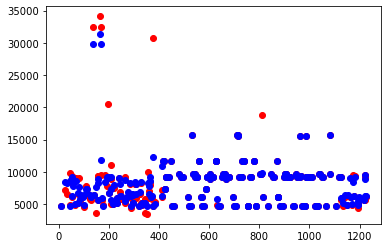

In [34]:
fig, ax = plt.subplots()
ax.scatter(testurut.index,testurut.y_test, color = "red")
ax.scatter(testurut.index,testurut.y_pred, color = "blue")

In [35]:
testurut1 = testurut.sort_values(by='y_pred')
testurut1

,y_test,y_pred
290,4366.8250,4638.787104
10,4778.2050,4673.947321
321,4674.2617,4694.524464
754,4702.1660,4702.166000
519,4702.1660,4702.166000
...,...,...
713,15650.5130,15650.513000
712,15650.5130,15650.513000
170,32496.9590,29798.415702
135,32496.9590,29798.415702


In [36]:
testurut1.reset_index(inplace=True)

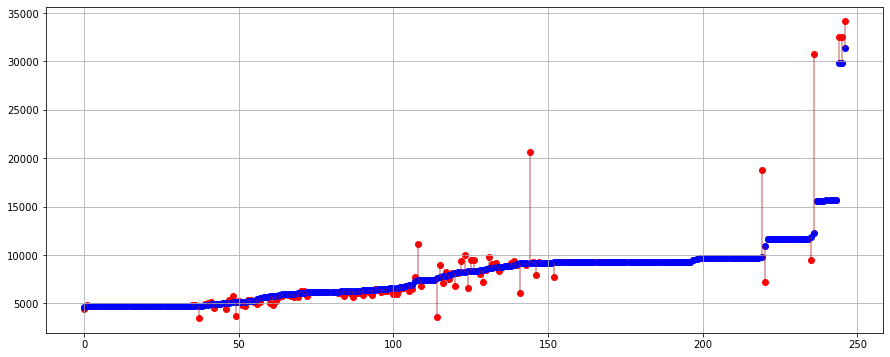

In [45]:
plt.figure(figsize=(15,6))
plt.scatter(testurut1.index,testurut1.y_test, color = "red")
plt.scatter(testurut1.index,testurut1.y_pred, color = "blue")
for i in testurut1 :
    plt.vlines(x=testurut1.index, ymin=testurut1.y_test, ymax=testurut1.y_pred, colors='firebrick', alpha=0.2)
plt.grid()
plt.show()

## Train dataset

In [46]:
y_pred_train = rfc.predict(X_train)

In [47]:
train = pd.DataFrame({'y_train':y_train,'y_pred_train' : y_pred_train})

In [48]:
train = train.sort_values(by='y_train')
train.reset_index(inplace=True)

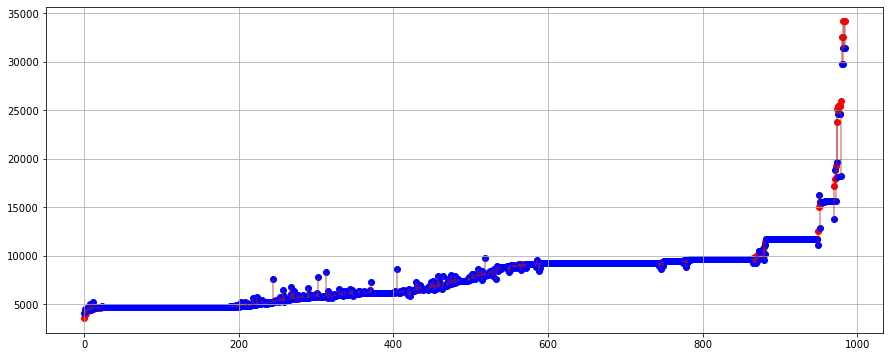

In [50]:
plt.figure(figsize=(15,6))
plt.scatter(train.index,train.y_train, color = "red")
plt.scatter(train.index,train.y_pred_train, color = "blue")
for i in train :
    plt.vlines(x=train.index, ymin=train.y_train, ymax=train.y_pred_train, colors='firebrick', alpha=0.2)
plt.grid()
plt.show()

# TRY TO BIN SCATTER

In [54]:
testurut1['x'] = testurut1.index

In [55]:
testurut1

,index,y_test,y_pred,interval,x
0,290,4366.8250,4638.787104,"(-0.246, 0.384]",0
1,10,4778.2050,4673.947321,"(0.769, 1.153]",1
2,321,4674.2617,4694.524464,"(1.922, 2.306]",2
3,754,4702.1660,4702.166000,"(2.691, 3.075]",3
4,519,4702.1660,4702.166000,"(3.844, 4.228]",4
...,...,...,...,...,...
242,713,15650.5130,15650.513000,"(241.772, 242.156]",242
243,712,15650.5130,15650.513000,"(242.925, 243.309]",243
244,170,32496.9590,29798.415702,"(243.694, 244.078]",244
245,135,32496.9590,29798.415702,"(244.847, 245.231]",245


In [76]:
#buat resclae dan ngebin
testurut1['interval'] = pd.cut(testurut1.x, 20)

mean   = testurut1.groupby(testurut1.interval).mean()['y_test']
mean1 = testurut1.groupby(testurut1.interval).mean()['y_pred']
median = testurut1.groupby(testurut1.interval).median()['x']

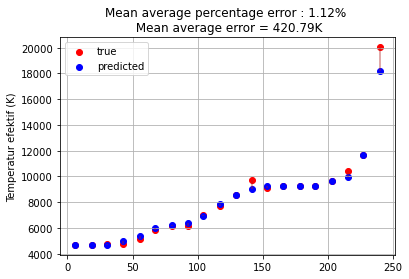

In [78]:
#plt.figure(figsize=(15,10))
plt.scatter(median, mean, color = "red", label = 'true')
plt.scatter(median, mean1, color = "blue", label = 'predicted')
for i in train :
    plt.vlines(x=median, ymin=mean, ymax=mean1, colors='firebrick', alpha=0.2)
plt.ylabel('Temperatur efektif (K)')
plt.title('Mean average percentage error : 1.12% \n Mean average error = 420.79K')
plt.legend()
plt.grid()
plt.show()

In [66]:
from sklearn.metrics import mean_absolute_percentage_error

mean_absolute_percentage_error(testurut1.y_test, testurut1.y_pred)

0.044320854907329676

In [69]:
p = abs(sum(testurut1.y_test)-sum(testurut1.y_pred))/sum(testurut1.y_test)*100

In [70]:
p

1.1286055549792628